In [1]:
import utils, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tqdm import tnrange, tqdm_notebook
%matplotlib inline

# Load Data

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
print(data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
pd.DataFrame(data['data'], columns=data['feature_names']).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x = data['data']
print(x.shape)
x[:3]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [6]:
y = data['target']
print(y.shape)
y[:3]

(150,)


array([0, 0, 0])

In [7]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
# Cambiamos la representacion de y a one-hot
y = np.eye(3)[y]
print(y.shape)
y[:3]

(150, 3)


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [10]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(data['target_names'])}
idx2class

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Ejemplo de las diapositivas

In [12]:
eg_x = x_train[0]
eg_y = y_train[0]
eg_x, eg_y

(array([4.6, 3.6, 1. , 0.2]), array([1., 0., 0.]))

In [13]:
eg_x.shape

(4,)

In [14]:
# Añadimos una dimension a eg_x
eg_x = x_train[0][:,None]
eg_x.shape

(4, 1)

In [15]:
eg_y.shape

(3,)

In [16]:
# definimos una matriz de pesos eg_w
np.random.seed(2)
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(1)
print(f'shape: {eg_w.shape}')
eg_w

shape: (3, 4)


array([[-0.4, -0.1, -2.1,  1.6],
       [-1.8, -0.8,  0.5, -1.2],
       [-1.1, -0.9,  0.6,  2.3]])

In [17]:
# definimos una matriz de bias eg_b
np.random.seed(3)
eg_b = np.random.normal(size=3).round(1)
print(f'shape: {eg_b.shape}')
eg_b

shape: (3,)


array([1.8, 0.4, 0.1])

## Definimos el modelo

$ \hat{y} = f(x) = Wx + b $

In [18]:
def f(x): return (eg_w@x).ravel() + eg_b

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [ -2.18 -10.5   -7.14]


###  Softmax

$ softmax(\hat{y_i}) = \frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}} $

In [19]:
np.exp(eg_y_)

array([1.13041531e-01, 2.75364493e-05, 7.92752096e-04])

In [20]:
np.exp(eg_y_).sum()

0.1138618191862661

In [21]:
def softmax(x):
    exp = np.exp(x)
    return  exp / exp.sum()

softmax(eg_y_)

array([9.92795754e-01, 2.41840940e-04, 6.96240498e-03])

### Incluyendo la funcion de activacion

$ \hat{y} = f(x) =  softmax(Wx + b) $

In [22]:
def f(x): return softmax((eg_w@x).ravel() + eg_b)

eg_y_ = f(eg_x)
print(f'data: {eg_y}')
print(f'model: {eg_y_}')

data: [1. 0. 0.]
model: [9.92795754e-01 2.41840940e-04 6.96240498e-03]


## Loss function: Cross entropy

$ L = - \frac{1}{m} \sum\limits_{i=1}^m p(x_i) \log{q(x_i)} $

* p(x): real values
* q(x): predicted values

$ \log{q(x_i)} = \log{\frac{e^{\hat{y_i}}}{\sum\limits_j e^{\hat{y_j}}}} $

In [23]:
np.log(eg_y_)

array([-7.23032181e-03, -8.32723032e+00, -4.96723032e+00])

In [24]:
def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()

eg_loss = L(eg_y, eg_y_)
eg_loss

0.007230320801531907

## View example

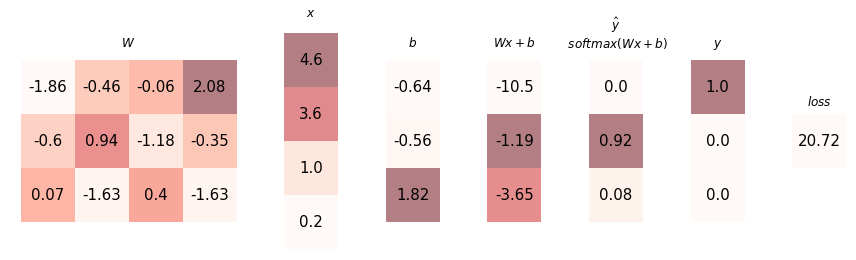

In [25]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4)).round(2)
eg_b = np.random.normal(size=3).round(2)

utils.example(eg_x, eg_y, eg_w, eg_b)

# Tensorflow

Vamos a usar tensorflow para calcular automaticamente las gradientes de nuestras operaciones.

In [26]:
import tensorflow as tf

# Iniciamos una session de tf, si no existe una
if 'sess' not in locals(): sess = tf.InteractiveSession()

# tf Graph Input
X = tf.placeholder(tf.float32, shape=(None, 4))
Y = tf.placeholder(tf.float32, shape=(None, 3))

# Set model weights
W = tf.Variable(tf.random_normal([4,3]))
b = tf.Variable(tf.random_normal([3]))

# Output
# def f(x): return softmax((eg_w@x).ravel() + eg_b)
y_ = tf.nn.softmax((X @ W) + b)

# Loss
# def L(y, y_): return -(y * np.log(y_ + 1e-9)).sum()
loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_ + 1e-9), axis=1))

# Se inicializan las variables
sess.run(tf.global_variables_initializer())

In [27]:
W

<tf.Variable 'Variable:0' shape=(4, 3) dtype=float32_ref>

In [28]:
W.eval()

array([[ 1.697156  , -1.5809501 ,  0.8636052 ],
       [ 1.3861477 ,  1.8743316 ,  0.16874357],
       [-1.4812206 , -0.13645007, -0.24811591],
       [ 0.85772455, -0.15910766,  0.30982268]], dtype=float32)

In [29]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [32]:
# Si ejecutamos esta linea, tendremos un error dado que tenemos que especificar
# los valores de X e Y, que son necesarios para calcular la perdida.
loss.eval()

In [33]:
# Obtenemos la perdida con los primeros 5 ejemplos
sess.run(loss, feed_dict={X: x_train[:5], Y:y_train[:5]})

3.2352738

In [34]:
# vemos las gradientes
sess.run(tf.gradients(loss, W), feed_dict={X: x_train[:5], Y:y_train[:5]})

[array([[ 1.3234961e+00, -1.3257896e+00,  2.2934619e-03],
        [ 6.1218286e-01, -6.1342043e-01,  1.2376283e-03],
        [ 8.6940521e-01, -8.7067395e-01,  1.2688085e-03],
        [ 2.7666199e-01, -2.7703342e-01,  3.7141325e-04]], dtype=float32)]

## Optimizacion: Mini-batch gradient descent

In [35]:
# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)
nb = math.ceil(len(x_train) / bs)
nb # Numero de batches por epoch

4

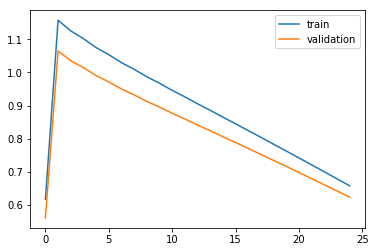

In [36]:
# Train loop
train_losses = []
val_losses = []

for epoch in tnrange(epochs):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = x_train[i*bs:(i+1)*bs]
        batch_y = y_train[i*bs:(i+1)*bs]
        sess.run(optimizer, feed_dict={X: batch_x, Y:batch_y})

    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = sess.run(loss, feed_dict={X: x_train, Y:y_train})
    train_losses.append(train_loss)
    val_loss = sess.run(loss, feed_dict={X: x_val, Y:y_val})
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend();

## Veamos el resultado

In [37]:
pred, pred_loss = sess.run([y_, loss], feed_dict={X: x_val, Y:y_val})
pred_loss

0.6234311

In [38]:
y_val[0], pred[0]

(array([0., 1., 0.]),
 array([0.01305561, 0.14704861, 0.8398958 ], dtype=float32))

In [39]:
# Para obtener las predicciones finales vamos a usar np.argmax,
# que devuelve el indice con el mayor valor
np.argmax(y_val[0]), np.argmax(pred[0])

(1, 2)

In [40]:
# Obtenemos todos los labels
real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred, axis=1)
real_labels[:10], pred_labels[:10]

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1]), array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2]))

In [41]:
# Vamos a usar una metrica de accuracy para comparar los resultados
pred_acc = (real_labels == pred_labels).mean()
pred_acc

0.7

In [42]:
print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.62
Accuracy = 0.70


# Keras

Ahora vamos a ver el codigo equivalente usando keras.

In [43]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 25
lr = 0.1

# Modelo
model = Sequential()
model.add(Dense(3, activation='softmax', input_shape=(4,)))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


In [44]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=[x_val, y_val])

Train on 120 samples, validate on 30 samples
Epoch 1/25
120/120 [==============================] - 0s 653us/step - loss: 3.1179 - acc: 0.3583 - val_loss: 0.8858 - val_acc: 0.5000
Epoch 2/25
120/120 [==============================] - 0s 70us/step - loss: 0.7992 - acc: 0.6000 - val_loss: 0.9868 - val_acc: 0.6333
Epoch 3/25
120/120 [==============================] - 0s 62us/step - loss: 0.8784 - acc: 0.6250 - val_loss: 1.3607 - val_acc: 0.6333
Epoch 4/25
120/120 [==============================] - 0s 98us/step - loss: 1.2071 - acc: 0.6250 - val_loss: 0.9084 - val_acc: 0.6333
Epoch 5/25
120/120 [==============================] - 0s 85us/step - loss: 0.7162 - acc: 0.7083 - val_loss: 0.7615 - val_acc: 0.6333
Epoch 6/25
120/120 [==============================] - 0s 74us/step - loss: 0.6176 - acc: 0.6583 - val_loss: 0.8301 - val_acc: 0.6333
Epoch 7/25
120/120 [==============================] - 0s 97us/step - loss: 0.5697 - acc: 0.7083 - val_loss: 0.5339 - val_acc: 0.7333
Epoch 8/25
120/120 [===

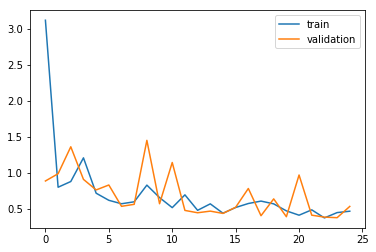

In [45]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend();

## Resultados

In [46]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

30/30 [==============================] - 0s 33us/step
Loss = 0.53
Accuracy = 0.63


# Redes Neuronales

In [47]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w = np.random.normal(size=4*3).reshape((3,4))
eg_b = np.random.normal(size=3)

Si vemos nuevamente el ejemplo, la capacidad del modelo depende en parte de la cantidad de parametros que puede aprender:

In [48]:
eg_x.shape, eg_w.shape, eg_b.shape

((4, 1), (3, 4), (3,))

En este caso la matriz **eg_w** tiene 12 parámetros y **eg_b** tiene 3 parámetros. Por lo que nuestro modelo tiene un **total de 15 parámetros**.

**¿Cómo incrementamos el número de parámetros?**

Tenemos: `w(3x4) @ x(4x1) = (3x1)` (3x4 = 12 parámetros)

Agregamos una matriz intermedia: `w1(10x4) @ x(4x1) = (10x1) -->  w2(3x10) @ (10x1) = (3x1)` (10x4 + 3x10 = 70 parámetros)

**Agregando una matriz intermedia incrementamos los parámetros de 12 a 70.**

In [49]:
i = np.random.choice(len(x_train))
i = 0
eg_x = x_train[i][:,None]
eg_y = y_train[i]
eg_w1 = np.random.normal(size=10*4).reshape((10,4))
eg_b1 = np.random.normal(size=10).reshape((10,1))
eg_w2 = np.random.normal(size=3*10).reshape((3,10))
eg_b2 = np.random.normal(size=3).reshape((3,1))

In [50]:
temp = ((eg_w1 @ eg_x) + eg_b1)
temp.shape

(10, 1)

In [51]:
y_ = ((eg_w2 @ temp) + eg_b2).ravel()
y_.shape

(3,)

**Pero hay un problema con esta formulación:** un conjunto de operaciones lineales (multiplicaciones y sumas), se pueden reducir a una sola multiplicacion y suma:

$ y_1 = 2x + 10 $

$ y_2 = softmax(3y_1 - 5) = softmax(((2x + 10) * 3) - 5) = softmax(6x + 25) $

<br>

**Solucion: Funciones de activación**

La idea de las funciones de activación es agregar funciones no lineales entre capa y capa (capa = multiplicacion+suma).

$ y_1 = \sigma(2x + 10) $

$ y_2 = softmax(3y_1 - 5) $

\* *La funcion softmax se considera una funcion de activación.*

## Tensorflow

In [52]:
import tensorflow as tf

# Iniciamos una session de tf, si no existe una
if 'sess' not in locals(): sess = tf.InteractiveSession()

# tf Graph Input
X = tf.placeholder(tf.float32, shape=(None, 4))
Y = tf.placeholder(tf.float32, shape=(None, 3))

# Set model weights
W1 = tf.Variable(tf.random_normal([4,10]))
b1 = tf.Variable(tf.random_normal([10]))

W2 = tf.Variable(tf.random_normal([10,3]))
b2 = tf.Variable(tf.random_normal([3]))

# Outputs
y_ = tf.nn.relu((X @ W1) + b1)
y_ = tf.nn.softmax((y_ @ W2) + b2)

# Loss
loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_ + 1e-9), axis=1))

# Se inicializan las variables
sess.run(tf.global_variables_initializer())

In [53]:
# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)
nb = math.ceil(len(x_train) / bs)
nb # Numero de batches por epoch

4

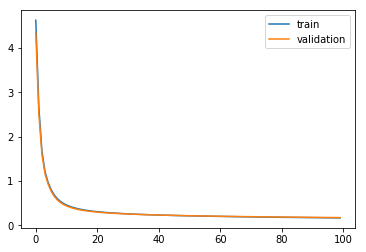

In [54]:
# Train loop
train_losses = []
val_losses = []

for epoch in tnrange(epochs):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = x_train[i*bs:(i+1)*bs]
        batch_y = y_train[i*bs:(i+1)*bs]
        sess.run(optimizer, feed_dict={X: batch_x, Y:batch_y})

    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = sess.run(loss, feed_dict={X: x_train, Y:y_train})
    train_losses.append(train_loss)
    val_loss = sess.run(loss, feed_dict={X: x_val, Y:y_val})
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend();

In [55]:
pred, pred_loss = sess.run([y_, loss], feed_dict={X: x_val, Y:y_val})

real_labels = np.argmax(y_val, axis=1)
pred_labels = np.argmax(pred, axis=1)

pred_acc = (real_labels == pred_labels).mean()

print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')

Loss = 0.18
Accuracy = 0.97


## Keras

In [56]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

# Params
bs = 32 # Batch size
epochs = 100
lr = 0.01

# Modelo
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=[x_val, y_val])

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 838us/step - loss: 1.4524 - acc: 0.5083 - val_loss: 0.8505 - val_acc: 0.7000
Epoch 2/100
120/120 [==============================] - 0s 63us/step - loss: 0.8653 - acc: 0.6583 - val_loss: 0.7876 - val_acc: 0.7333
Epoch 3/100
120/120 [==============================] - 0s 70us/step - loss: 0.7973 - acc: 0.6833 - val_loss: 0.7650 - val_acc: 0.8000
Epoch 4/100
120/120 [==============================] - 0s 67us/step - loss: 0.7592 - acc: 0.8000 - val_loss: 0.7313 - val_acc: 0.7000
Epoch 5/100
120/120 [==============================] - 0s 68us/step - loss: 0.7401 - acc: 0.7000 - val_loss: 0.7149 - val_acc: 0.7000
Epoch 6/100
120/120 [==============================] - 0s 73us/step - loss: 0.7211 - acc: 0.7083 - val_loss: 0.6990 - val_acc: 0.8000
Epoch 7/100
120/120 [==============================] - 0s 92us/step - loss: 0.7001 - acc: 0.7917 - val_loss: 0.6807 - val_acc: 0.7000
Epoch 8/100
120/

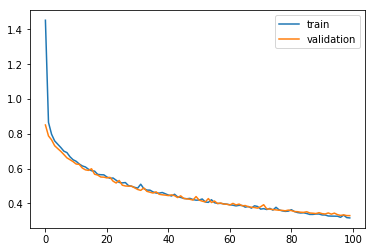

In [58]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend();

In [59]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Loss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

30/30 [==============================] - 0s 102us/step
Loss = 0.33
Accuracy = 0.93


# Ejercicio

**Faulty Steel Plates**

Steel plate faults classified into seven types

This dataset comes from research by Semeion, Research Center of Sciences of Communication. The original aim of the research was to correctly classify the type of surface defects in stainless steel plates, with six types of possible defects (plus "other"). The Input vector was made up of 27 indicators that approximately describe the geometric shape of the defect and its outline. According to the research paper, Semeion was commissioned by the Centro Sviluppo Materiali (Italy) for this task and therefore it is not possible to provide details on the nature of the 27 indicators used as Input vectors or the types of the 6 classes of defects. 

In [60]:
data = pd.read_csv('data/faults.csv')
print(data.shape)
data.head()

(1941, 34)


,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [61]:
x = data.iloc[:, :-7]
y = data.iloc[:, -7:]

x.columns, y.columns

(Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
        'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
        'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
        'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
        'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
        'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
        'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
        'SigmoidOfAreas'],
       dtype='object'),
 Index(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps',
        'Other_Faults'],
       dtype='object'))

In [62]:
# Armamos un diccionario para el target
idx2class = {i:e for i,e in enumerate(y.columns)}
idx2class

{0: 'Pastry',
 1: 'Z_Scratch',
 2: 'K_Scatch',
 3: 'Stains',
 4: 'Dirtiness',
 5: 'Bumps',
 6: 'Other_Faults'}

In [63]:
# Train validation split
x_train, x_val, y_train, y_val = train_test_split(x, y.values, test_size=0.3, random_state=42)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1358, 27), (583, 27), (1358, 7), (583, 7))

In [64]:
# preprocess
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [65]:
x_train[0]

array([-0.98092525, -0.84116281,  3.63697701,  3.6369304 ,  0.34403919,
        0.20960252,  0.03001974,  0.38907196, -0.45348069, -0.17247613,
       -0.69354383, -0.81249412,  0.81249412, -0.70407447, -0.75996547,
        0.32012064, -0.77876817,  1.10514645,  0.60609727, -1.40193739,
       -1.20118935,  1.39360954,  1.69611176,  0.66368059, -1.47692834,
       -0.15336504,  1.24210091])

In [66]:
y_train[0], idx2class[np.argmax(y_train[0])]

(array([0, 0, 1, 0, 0, 0, 0]), 'K_Scatch')

**Entrenar una red neuronal para predecir el tipo de fallo usando Tensorflow o Keras**

## Tensorflow

In [67]:
import tensorflow as tf

# Iniciamos una session de tf, si no existe una
if 'sess' not in locals(): sess = tf.InteractiveSession()

# tf Graph Input
X = tf.placeholder(tf.float32, shape=(None, 27))
Y = tf.placeholder(tf.float32, shape=(None, 7))

# Set model weights
W1 = tf.Variable(tf.random_normal([27,64]))
b1 = tf.Variable(tf.random_normal([64]))

W2 = tf.Variable(tf.random_normal([64,32]))
b2 = tf.Variable(tf.random_normal([32]))

W3 = tf.Variable(tf.random_normal([32,7]))
b3 = tf.Variable(tf.random_normal([7]))

# Outputs
y_ = tf.nn.relu((X @ W1) + b1)
y_ = tf.nn.relu((y_ @ W2) + b2)
y_ = tf.nn.softmax((y_ @ W3) + b3)

# Loss
loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_ + 1e-9), axis=1))

# Se inicializan las variables
sess.run(tf.global_variables_initializer())

In [68]:
# Params
bs = 128 # Batch size
epochs = 100
lr = 0.01
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)
nb = math.ceil(len(x_train) / bs)

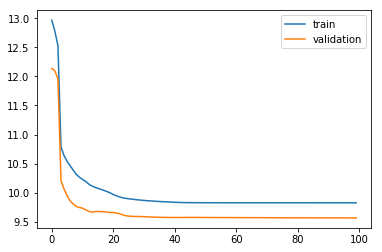

In [69]:
# Train loop
train_losses = []
val_losses = []

for epoch in tnrange(epochs):
    # Cada epoch es un recorrido por todo el train set
    for i in range(nb):
        batch_x = x_train[i*bs:(i+1)*bs]
        batch_y = y_train[i*bs:(i+1)*bs]
        sess.run(optimizer, feed_dict={X: batch_x, Y:batch_y})

    # Calculamos la perdida en el train y validation set luego de cada epoch
    train_loss = sess.run(loss, feed_dict={X: x_train, Y:y_train})
    train_losses.append(train_loss)
    val_loss = sess.run(loss, feed_dict={X: x_val, Y:y_val})
    val_losses.append(val_loss)

plt.plot(train_losses, label='train')
plt.plot(val_losses, label='validation')
plt.legend();

In [70]:
def metrics(x, y):
    pred, pred_loss = sess.run([y_, loss], feed_dict={X: x, Y:y})
    real_labels = np.argmax(y, axis=1)
    pred_labels = np.argmax(pred, axis=1)
    pred_acc = (real_labels == pred_labels).mean()
    print(f'Loss = {pred_loss:.2f}\nAccuracy = {pred_acc:.2f}')
    
print('Train')
metrics(x_train, y_train)
print('\nValidation')
metrics(x_val, y_val)

Train
Loss = 9.83
Accuracy = 0.53

Validation
Loss = 9.57
Accuracy = 0.52


## Keras

In [71]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

# Params
bs = 128 # Batch size
epochs = 100
lr = 0.01

# Modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(27,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer=SGD(lr), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1792      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 231       
Total params: 4,103
Trainable params: 4,103
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Entrenamiento
log = model.fit(x_train, y_train, batch_size=bs, epochs=epochs, validation_data=[x_val, y_val])

Train on 1358 samples, validate on 583 samples
Epoch 1/100
1358/1358 [==============================] - 0s 112us/step - loss: 1.9206 - acc: 0.0825 - val_loss: 1.8535 - val_acc: 0.1544
Epoch 2/100
1358/1358 [==============================] - 0s 18us/step - loss: 1.8082 - acc: 0.2555 - val_loss: 1.7506 - val_acc: 0.3310
Epoch 3/100
1358/1358 [==============================] - 0s 17us/step - loss: 1.7201 - acc: 0.3520 - val_loss: 1.6678 - val_acc: 0.3877
Epoch 4/100
1358/1358 [==============================] - 0s 23us/step - loss: 1.6494 - acc: 0.4212 - val_loss: 1.6017 - val_acc: 0.4220
Epoch 5/100
1358/1358 [==============================] - 0s 23us/step - loss: 1.5927 - acc: 0.4492 - val_loss: 1.5482 - val_acc: 0.4700
Epoch 6/100
1358/1358 [==============================] - 0s 19us/step - loss: 1.5468 - acc: 0.4647 - val_loss: 1.5036 - val_acc: 0.5026
Epoch 7/100
1358/1358 [==============================] - 0s 18us/step - loss: 1.5082 - acc: 0.4728 - val_loss: 1.4656 - val_acc: 0.5094


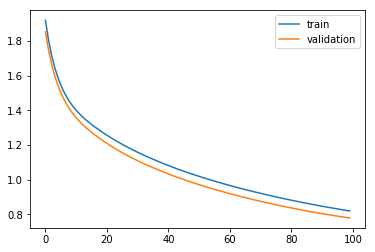

In [73]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
plt.legend();

In [74]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print(f'Train\nLoss = {train_loss:.2f}\nAccuracy = {train_acc:.2f}')
print(f'\nValidation\nLoss = {val_loss:.2f}\nAccuracy = {val_acc:.2f}')

Train
Loss = 0.82
Accuracy = 0.71

Validation
Loss = 0.78
Accuracy = 0.72
